In [ ]:
## Benchmarking cholesky decomposition
import numpy as np
import time
from scipy.sparse import linalg
from scipy import random
from matplotlib import pyplot as plt
from scipy.sparse import bsr_matrix, coo_matrix, csc_matrix, csr_matrix, dia_matrix, dok_matrix, lil_matrix

In [8]:
def random_matrix(matrixSize):
    A = random.rand(matrixSize,matrixSize)
    B = np.dot(A,A.transpose())
    return B

In [13]:
def time_decomp(matrix):
    start = time.clock()
    c = linalg.spilu(matrix)
    end = time.clock()
    return end - start

/anaconda3/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:370: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/anaconda3/lib/python3.6/site-packages/scipy/sparse/coo.py:421: SparseEfficiencyWarning: Constructing a DIA matrix with 199 diagonals is inefficient
  "is inefficient" % len(diags), SparseEfficiencyWarning)


Decomp times for  <class 'scipy.sparse.bsr.bsr_matrix'>
[0.0005608999999992647, 0.005875999999994974]
Decomp times for  <class 'scipy.sparse.coo.coo_matrix'>
[0.0011353000000042357, 0.0030490999999983615]
Decomp times for  <class 'scipy.sparse.csc.csc_matrix'>
[0.00046870000000183155, 0.001998100000002978]
Decomp times for  <class 'scipy.sparse.csr.csr_matrix'>
[0.0008131000000048516, 0.0024895000000014988]
Decomp times for  <class 'scipy.sparse.dia.dia_matrix'>
[0.0013714000000049965, 0.006613299999995092]
Decomp times for  <class 'scipy.sparse.dok.dok_matrix'>
[0.001206099999996013, 0.009797300000002451]
Decomp times for  <class 'scipy.sparse.lil.lil_matrix'>
[0.001175200000002974, 0.0085381999999953]


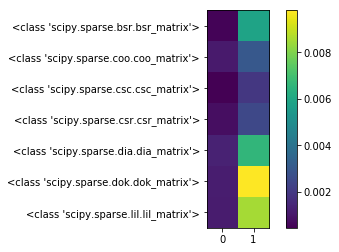

In [37]:
MATRIX_TYPES = [bsr_matrix, coo_matrix, csc_matrix, csr_matrix, dia_matrix, dok_matrix, lil_matrix]

total_times = []
for mat_type in MATRIX_TYPES:
    times = []
    for exp_size in range(1, 3):
        t = []
        for _ in range(10):
            B = random_matrix(10**exp_size)
            t.append(time_decomp(mat_type(B)))
        times.append(sum(t) / float(len(t)))
    print('Decomp times for ', mat_type)
    print(times)
    total_times.append(times)

plt.yticks([0,1,2,3,4,5,6], MATRIX_TYPES)
plt.imshow(total_times)
plt.colorbar()
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:370: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


Decomp times for  <class 'scipy.sparse.bsr.bsr_matrix'>
[0.6888127999999994]
Decomp times for  <class 'scipy.sparse.coo.coo_matrix'>
[0.5958735999999959]
Decomp times for  <class 'scipy.sparse.csc.csc_matrix'>
[0.5543101000000036]
Decomp times for  <class 'scipy.sparse.csr.csr_matrix'>
[0.599581699999996]


/anaconda3/lib/python3.6/site-packages/scipy/sparse/coo.py:421: SparseEfficiencyWarning: Constructing a DIA matrix with 1999 diagonals is inefficient
  "is inefficient" % len(diags), SparseEfficiencyWarning)


Decomp times for  <class 'scipy.sparse.dia.dia_matrix'>
[0.5440163000000041]
Decomp times for  <class 'scipy.sparse.dok.dok_matrix'>
[0.34134440000000554]
Decomp times for  <class 'scipy.sparse.lil.lil_matrix'>
[1.045567200000005]


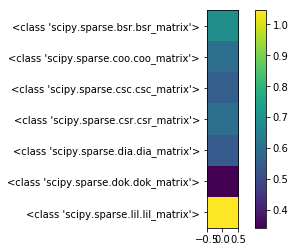

In [38]:
MATRIX_TYPES = [bsr_matrix, coo_matrix, csc_matrix, csr_matrix, dia_matrix, dok_matrix, lil_matrix]

total_times = []
for mat_type in MATRIX_TYPES:
    times = []
    for exp_size in range(3, 4):
        t = []
        for _ in range(10):
            B = random_matrix(10**exp_size)
            t.append(time_decomp(mat_type(B)))
        times.append(sum(t) / float(len(t)))
    print('Decomp times for ', mat_type)
    print(times)
    total_times.append(times)

plt.yticks([0,1,2,3,4,5,6], MATRIX_TYPES)
plt.imshow(total_times)
plt.colorbar()
plt.show()